<a href="https://colab.research.google.com/github/Rogerio-mack/Machine-Learning-I/blob/main/ML7_ponto_de_partida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Por que e Como Selecionar diferentes modelos?**
---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

# Pontos importantes!

* **Nenhum modelo é melhor que outro à priori.** Isso depende dos dados.
* *Melhor*, depende da métrica escolhida
* Entre dois modelos que competem, com mesmos resultados, o modelo mais simples é o melhor modelo (*Princípio da Navalha de Occam*) 

<br>

# Selecionando Diferentes Modelos


![imagem](https://scikit-learn.org/stable/_static/ml_map.png) 

<small>
<b> 
Figura 8. Diagrama do scikit-learn para seleção de modelos. <br></b>(Fonte: https://scikit-learn.org/)








# Selecionando Classificadores



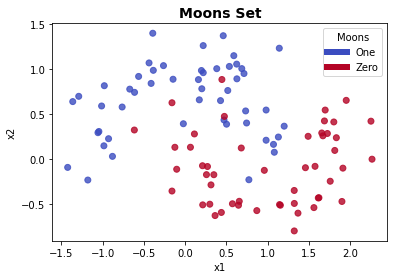

         x1        x2  y
0 -0.763251  0.577354  0
1 -0.391942  1.395641  0
2  1.324561 -0.492319  1
3  0.271295 -0.082532  1
4  2.253887  0.420281  1


In [2]:
#@markdown 
from sklearn.datasets import make_moons
cmap_data = plt.cm.coolwarm 

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)

df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

plt.scatter(df.x1, df.x2, c=df.y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Set',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

plt.show()

print(df.head())

In [4]:
#@markdown 
def border(clf):
  x_min, x_max = X['x1'].min() - .5, X['x1'].max() + .5
  y_min, y_max = X['x2'].min() - .5, X['x2'].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                      np.arange(y_min, y_max, 0.2))

  if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
  else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cmap_data, alpha=0.8)  
  plt.scatter(X['x1'], X['x2'], c=y, cmap=cmap_data, alpha=0.8)
  plt.title(str(clf)[0:str(clf).index('(')] + ' Moons Predictions',weight='bold',fontsize=14)
  plt.xlabel("x1")
  plt.ylabel("x2")

  custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                  Line2D([0], [0], color=cmap_data(1.), lw=6)]

  plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

  plt.show()
  return  


In [5]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingClassifier().get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier()>

LogisticRegression()


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


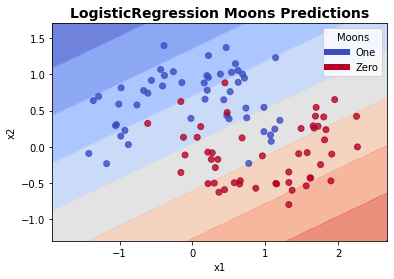


Detailed classification report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


KNeighborsClassifier(metric='euclidean', n_neighbors=4)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


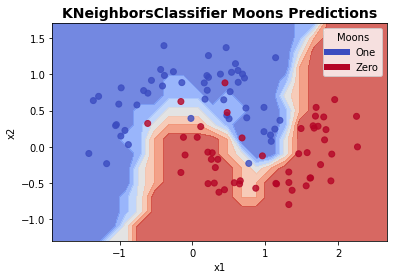


Detailed classification report:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.80      0.89        15

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30


DecisionTreeClassifier(max_depth=2)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


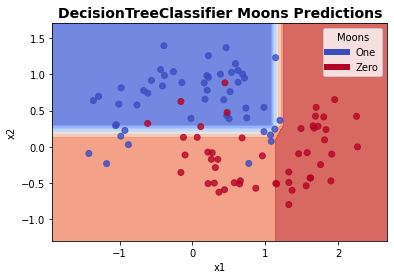


Detailed classification report:

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.82      0.93      0.87        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30


RandomForestClassifier(n_estimators=5)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


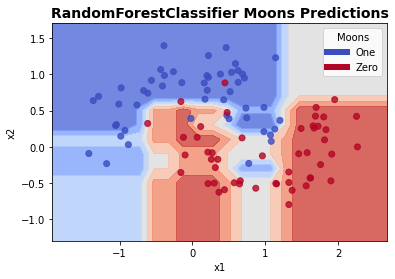


Detailed classification report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


GradientBoostingClassifier(n_estimators=3)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


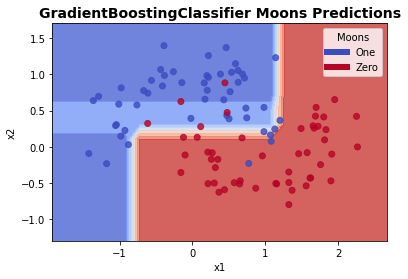


Detailed classification report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30




In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X = df[['x1','x2']]
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)


base_estimators = [ LogisticRegression(),
                    neighbors.KNeighborsClassifier(),
                    DecisionTreeClassifier(),
                    RandomForestClassifier(),
                    GradientBoostingClassifier()]
                    
                               
param_grids = [ {},
                {'n_neighbors': [3,4,5], 'metric': ['euclidean','manhattan']},
                {'max_depth': [2,3,4,5]},
                {'n_estimators':[3,4,5,6]}, 
                {'n_estimators':[3,4,5,6]}]             
                
for i in range(len(base_estimators)):
  clf = GridSearchCV(base_estimators[i], param_grids[i], cv=5, scoring='accuracy')
  clf.fit(X_train, y_train)
  # print(clf.cv_results_)
  print(clf.best_estimator_)
  border(clf.best_estimator_)
  print()
  print("Detailed classification report:")
  print()
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  print()


# Selecionando Regressores

,time,firing_rate
0,-80,34.970107
1,-80,36.785815
2,-80,34.478506
3,-80,34.991424
4,-80,32.241533


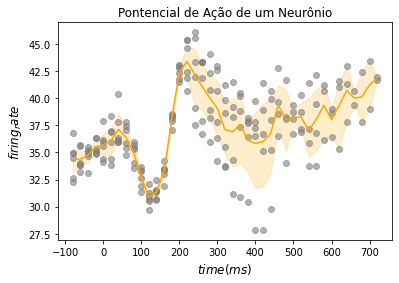

In [13]:
#@markdown
import seaborn as sns
df = sns.load_dataset('dots')
df = df[(df.choice == 'T2') & (df['align'] == 'dots')]
df = df[['time','firing_rate']].reset_index(drop=True)
display(df.head())

sns.lineplot(x=df.time, y=df.firing_rate,color='orange')
plt.scatter(x=df.time, y=df.firing_rate,color='gray',alpha=0.6)

plt.title('Pontencial de Ação de um Neurônio')
plt.xlabel('$time (ms)$',fontsize=12)
plt.ylabel('$firing_rate$',fontsize=12)
plt.show()

[19:07:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


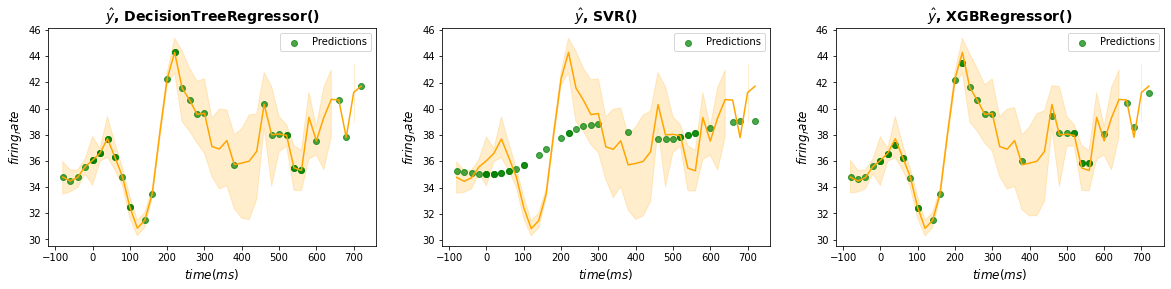

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor # entradas precisam ser normalizadas

base_estimators = [ DecisionTreeRegressor(),
                    SVR(),
                    XGBRegressor() ]

plt.figure(figsize=(20,4))
k = 1
for regressor in base_estimators:

  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  plt.subplot(1,3,k)
  k = k + 1
  sns.lineplot(x=X_train.time,y=y_train,color='orange')
  plt.scatter(X_test,y_pred,color='green',marker='o',alpha=0.7,label='Predictions')

  plt.title('$\\hat{y}$, ' + str(regressor),fontsize=14,weight='bold')
  plt.xlabel('$time (ms)$',fontsize=12)
  plt.ylabel('$firing_rate$',fontsize=12)
  plt.legend()

plt.show()



In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor # entradas precisam ser normalizadas

X = df[['time']]
y = df.firing_rate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

base_estimators = [ MLPRegressor(max_iter=8000),
                    DecisionTreeRegressor(),
                    SVR(),
                    XGBRegressor() ]
                                              
param_grids = [ {'hidden_layer_sizes':[(32,),(8,8),(8,16,8)], 'activation': ['logistic','tanh'], 'solver':['sgd', 'adam']},
                {'max_depth':[3,4,5]},
                {},
                {}]             
                
save_estimators = []

for i in range(len(base_estimators)):
  reg = GridSearchCV(base_estimators[i], param_grids[i], cv=5, scoring='neg_mean_squared_error')
  reg.fit(X_train, y_train)
  # print(clf.cv_results_)
  print(reg.best_estimator_)
  save_estimators.append(reg.best_estimator_)
  print()
  print("MSE Mean Square Error:")
  print()
  y_pred = reg.predict(X_test)
  print(reg.score(X_test, y_test))
  print()


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(activation='logistic', hidden_layer_sizes=(32,), max_iter=8000)

MSE Mean Square Error:

-9.36177384206241

DecisionTreeRegressor(max_depth=4)

MSE Mean Square Error:

-3.432988535863749

SVR()

MSE Mean Square Error:

-7.82387506810357

[19:04:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:s

In [12]:
save_estimators

[MLPRegressor(activation='logistic', hidden_layer_sizes=(32,), max_iter=8000),
 DecisionTreeRegressor(max_depth=4),
 SVR(),
 XGBRegressor()]